In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let us build a Decision Tree algorithm on the titanic dataset and measure its accuracy

**EDA**

In [207]:
df = pd.read_csv("../../data/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Before implementing the algorithm, we need to deal with the missing data

In [208]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

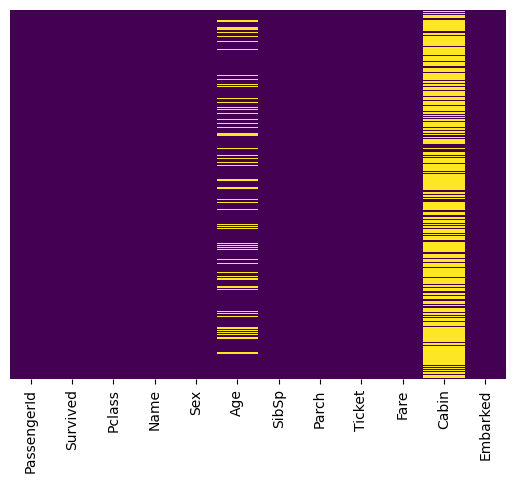

In [76]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis",cbar=False)

The Age column and the Cabin column have a lot of null values which needs to be dealt with

<Axes: xlabel='Pclass', ylabel='Age'>

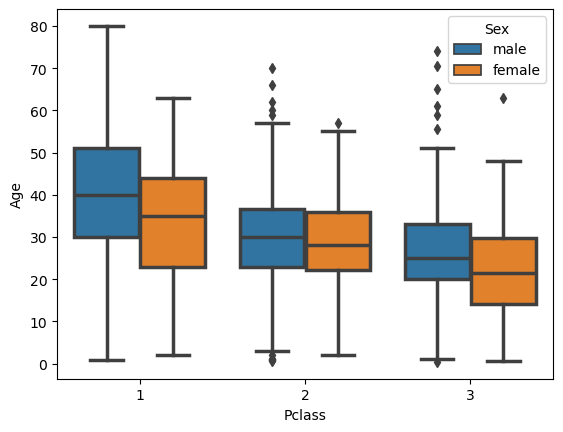

In [77]:
sns.boxplot(x=df.Pclass, y=df.Age, hue=df.Sex, linewidth=2.5, fliersize=5)

In [78]:
def calculateAge(columns):
    age = columns[0]
    pclass = columns[1]
    sex = columns[2]

    if(pd.isnull(age)):
        if(pclass == 1):
            if(sex == "male"):
                return 40
            else:
                return 35
        elif(pclass == 2):
            if(sex == "male"):
                return 30
            else:
                return 29
        else:
            if(sex == "male"):
                return 28
            else:
                return 25
    else:
        return age

In [79]:
df["Age"] = df[["Age","Pclass","Sex"]].apply(calculateAge, axis=1)

C:\Users\itsme\AppData\Local\Temp\ipykernel_27148\3071068192.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = columns[0]
C:\Users\itsme\AppData\Local\Temp\ipykernel_27148\3071068192.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass = columns[1]
C:\Users\itsme\AppData\Local\Temp\ipykernel_27148\3071068192.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sex = columns[2]


<Axes: >

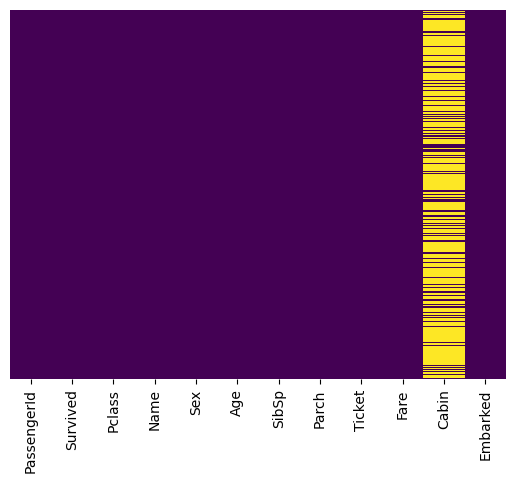

In [80]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis",cbar=False)

Since Cabin has a lot of missing values and cannot be accurately predicted, we are going to drop the column

In [209]:
df.drop("Cabin",axis=1,inplace=True)

In [82]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


It is important to choose the right variables(features) for training the model because using all the features for building the decision tree can lead to overfitting of model because of high variance and extremely low bias

The features selected for training are : Pclass, Sex, Age, Fare, Embarked

The output (or the dependent variable) : Survived

In [83]:
columns = ["Pclass", "Sex", "Age", "Fare", "Embarked", "Survived"]
df = df[columns]
df.head()

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,male,22.0,7.2500,S,0
1,1,female,38.0,71.2833,C,1
2,3,female,26.0,7.9250,S,1
3,1,female,35.0,53.1000,S,1
4,3,male,35.0,8.0500,S,0


Next step is to encode the data, ie, turn it into numerical values

In [84]:
print("Sex : ",df.Sex.value_counts(),"\n")
print("Embarked : ",df.Embarked.value_counts(),"\n")

Sex :  Sex
male      577
female    314
Name: count, dtype: int64 

Embarked :  Embarked
S    644
C    168
Q     77
Name: count, dtype: int64 



In [85]:
from sklearn.preprocessing import LabelEncoder

le_Sex = LabelEncoder()
le_Embarked = LabelEncoder()

df["Sex"] = le_Sex.fit_transform(df["Sex"])
df["Embarked"] = le_Embarked.fit_transform(df["Embarked"])

In [86]:
df.head()

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,1,22.0,7.2500,2,0
1,1,0,38.0,71.2833,0,1
2,3,0,26.0,7.9250,2,1
3,1,0,35.0,53.1000,2,1
4,3,1,35.0,8.0500,2,0


Now the dataset is ready to be used for training the Decision Tree model

In [87]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

In [210]:
X = df.drop("Survived",axis=1)
Y = df["Survived"]

Splitting the dataset into testing and training data

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

abc = GradientBoostingClassifier(n_estimators=1000, learning_rate=1)

In [90]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

Let us see the score for the model predictions, namely 

Accuracy, Classification Report and Confusion Matrix

In [91]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Y_pred = model.predict(X_test)

report = pd.DataFrame(classification_report(Y_test, Y_pred, output_dict=True))
score = accuracy_score(Y_test,Y_pred)
matrix = confusion_matrix(Y_test,Y_pred)

print("CLASSIFICATION REPORT\n\n",report,"\n\n")
print("ACCURACY SCORE\n\n",score,"\n\n")
print("CONFUSION MATRIX\n\n",matrix)

CLASSIFICATION REPORT

                     0           1  accuracy   macro avg  weighted avg
precision    0.790055    0.724138   0.76431    0.757097      0.762978
recall       0.817143    0.688525   0.76431    0.752834      0.764310
f1-score     0.803371    0.705882   0.76431    0.754627      0.763325
support    175.000000  122.000000   0.76431  297.000000    297.000000 


ACCURACY SCORE

 0.7643097643097643 


CONFUSION MATRIX

 [[143  32]
 [ 38  84]]


These scores are not the best. So we are going to implement hyperparameter tuning to use better parameters for training the model

In [92]:
model = tree.DecisionTreeClassifier()

parameters = {
    "criterion":("gini","entropy"),     #Determines the split by calculating gini impurity (For Gini) or info gain (For entropy)
    "splitter":("best","random"),       #If the splits are to be a) best among random features or b) best among all features
    "max_depth":(list(range(1,25))),    #The depth of the tree
    "min_samples_split":[2, 4, 6, 8],
    "min_samples_leaf":(list(range(1,25)))
}

In [94]:
from sklearn.model_selection import GridSearchCV

classifier = GridSearchCV(model, parameters, cv=5)

classifier.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24],
                         'min_samples_split': [2, 4, 6, 8],
                         'splitter': ('best', 'random')})

In [ ]:
best_parameter = classifier.best_params_
print(best_parameter)

{'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}


In [ ]:
model = tree.DecisionTreeClassifier(**best_parameter)
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=2,
                       splitter='random')

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Y_pred = model.predict(X_test)

report = pd.DataFrame(classification_report(Y_test, Y_pred, output_dict=True))
score = accuracy_score(Y_test,Y_pred)
matrix = confusion_matrix(Y_test,Y_pred)

print("CLASSIFICATION REPORT\n\n",report,"\n\n")
print("ACCURACY SCORE\n\n",score,"\n\n")
print("CONFUSION MATRIX\n\n",matrix)

CLASSIFICATION REPORT

                      0            1  accuracy    macro avg  weighted avg
precision     0.841644     0.709150  0.822969     0.775397      0.810377
recall        0.946342     0.423552  0.822969     0.684947      0.822969
f1-score      0.890928     0.530346  0.822969     0.710637      0.805834
support    4976.000000  1537.000000  0.822969  6513.000000   6513.000000 


ACCURACY SCORE

 0.8229694457239367 


CONFUSION MATRIX

 [[4709  267]
 [ 886  651]]


**RANDOM FOREST**

Why random forest ? 

A random forest is an estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

Lets try to classify the test data again but using the random forest this time

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
Y_pred = model.predict(X_test)

report = pd.DataFrame(classification_report(Y_test, Y_pred, output_dict=True))
score = accuracy_score(Y_test,Y_pred)
matrix = confusion_matrix(Y_test,Y_pred)

print("CLASSIFICATION REPORT\n\n",report,"\n\n")
print("ACCURACY SCORE\n\n",score,"\n\n")
print("CONFUSION MATRIX\n\n",matrix)

CLASSIFICATION REPORT

                     0           1  accuracy   macro avg  weighted avg
precision    0.859459    0.794643  0.835017    0.827051      0.834362
recall       0.873626    0.773913  0.835017    0.823770      0.835017
f1-score     0.866485    0.784141  0.835017    0.825313      0.834601
support    182.000000  115.000000  0.835017  297.000000    297.000000 


ACCURACY SCORE

 0.835016835016835 


CONFUSION MATRIX

 [[159  23]
 [ 26  89]]


**ADA BOOST**

For implementing ADA Boost, let us use the data "Adult" where the task is to classify data based on income (whether greater than 50K or less than 50K)

EDA on the dataset

In [8]:
df = pd.read_csv("../../data/adult.csv",names=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"],skiprows=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [9]:
for x in df.columns:
    print(x," : ",df.loc[df[x]=="?",x].size)

age  :  0
workclass  :  1836
fnlwgt  :  0
education  :  0
education-num  :  0
marital-status  :  0
occupation  :  1843
relationship  :  0
race  :  0
sex  :  0
capital-gain  :  0
capital-loss  :  0
hours-per-week  :  0
native-country  :  583
income  :  0


In [10]:
df.replace("?","nan",inplace=True)
df.dropna(inplace=True)

In [11]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
df["workclass"] = LabelEncoder().fit_transform(df["workclass"])
df["education"] = LabelEncoder().fit_transform(df["education"])
df["education-num"] = LabelEncoder().fit_transform(df["education-num"])
df["marital-status"] = LabelEncoder().fit_transform(df["marital-status"])
df["occupation"] = LabelEncoder().fit_transform(df["occupation"])
df["relationship"] = LabelEncoder().fit_transform(df["relationship"])
df["race"] = LabelEncoder().fit_transform(df["race"])
df["sex"] = LabelEncoder().fit_transform(df["sex"])
df["native-country"] = LabelEncoder().fit_transform(df["native-country"])
df["income"] = LabelEncoder().fit_transform(df["income"])

<Axes: >

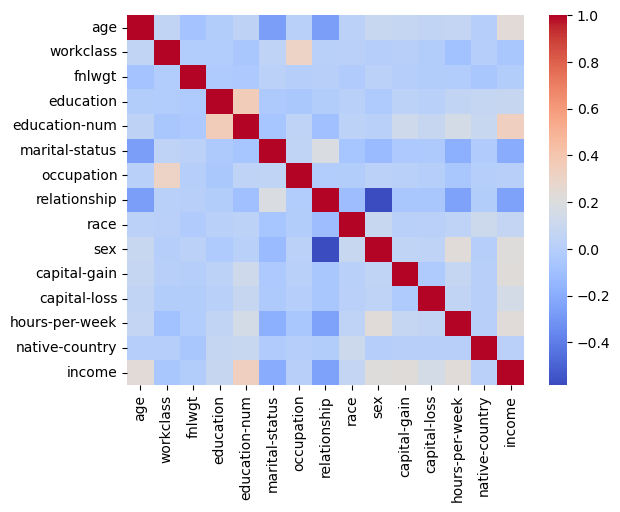

In [14]:
sns.heatmap(df.corr(), cmap="coolwarm")

In [15]:
from sklearn.preprocessing import MinMaxScaler
numerical = ["education-num","age","hours-per-week","capital-gain","sex","capital-loss","native-country","workclass","education"]

df[numerical] = MinMaxScaler().fit_transform(df[numerical])

In [16]:
X = df[["education-num","age","hours-per-week","capital-gain","sex","capital-loss","native-country","workclass","education"]]
Y = df["income"]

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [18]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

parameters = {
    'n_estimators': [50, 100, 200, 300],              
    'learning_rate': [0.01, 0.1, 0.5, 1.0],       
    'algorithm': ['SAMME', 'SAMME.R']  # SAMME.R is usually preferred as it uses probabilities
}

In [19]:
from sklearn.model_selection import GridSearchCV

classifier = GridSearchCV(model, parameters, cv=5)

classifier.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200, 300]})

In [ ]:
best_parameter = classifier.best_params_
print(best_parameter)

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 300}


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(**best_parameter)

In [ ]:
model = abc.fit(X_train, Y_train)

In [ ]:
Y_pred = model.predict(X_test)

report = pd.DataFrame(classification_report(Y_test, Y_pred, output_dict=True))
score = accuracy_score(Y_test,Y_pred)
matrix = confusion_matrix(Y_test,Y_pred)

print("CLASSIFICATION REPORT\n\n",report,"\n\n")
print("ACCURACY SCORE\n\n",score,"\n\n")
print("CONFUSION MATRIX\n\n",matrix)

CLASSIFICATION REPORT

                      0            1  accuracy    macro avg  weighted avg
precision     0.860541     0.792316  0.850453     0.826428      0.844440
recall        0.959807     0.496422  0.850453     0.728114      0.850453
f1-score      0.907467     0.610400  0.850453     0.758934      0.837362
support    4976.000000  1537.000000  0.850453  6513.000000   6513.000000 


ACCURACY SCORE

 0.8504529402732995 


CONFUSION MATRIX

 [[4776  200]
 [ 774  763]]


**GRADIENT BOOST CLASSIFIER**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

abc = GradientBoostingClassifier(n_estimators=300, learning_rate=0.2)

In [ ]:
model = abc.fit(X_train, Y_train)

In [ ]:
Y_pred = model.predict(X_test)

report = pd.DataFrame(classification_report(Y_test, Y_pred, output_dict=True))
score = accuracy_score(Y_test,Y_pred)
matrix = confusion_matrix(Y_test,Y_pred)

print("CLASSIFICATION REPORT\n\n",report,"\n\n")
print("ACCURACY SCORE\n\n",score,"\n\n")
print("CONFUSION MATRIX\n\n",matrix)

CLASSIFICATION REPORT

                      0            1  accuracy    macro avg  weighted avg
precision     0.868238     0.783862  0.854752     0.826050      0.848326
recall        0.954783     0.530904  0.854752     0.742844      0.854752
f1-score      0.909456     0.633049  0.854752     0.771253      0.844227
support    4976.000000  1537.000000  0.854752  6513.000000   6513.000000 


ACCURACY SCORE

 0.8547520343927529 


CONFUSION MATRIX

 [[4751  225]
 [ 721  816]]


**KNN ALGORITHM**

It is a simple classification and regression algorithm that classifies data samples into different classes based on its distance from the classes

In [18]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

In [19]:
parameters = {
    "n_neighbors":np.arange(1,30)
}

In [20]:
classifier = GridSearchCV(model,parameters,cv=5)

In [21]:
classifier.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [22]:
classifier.best_params_

{'n_neighbors': 20}

In [24]:
model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=20)

In [27]:
Y_pred = model.predict(X_test)

report = pd.DataFrame(classification_report(Y_test, Y_pred, output_dict=True))
score = accuracy_score(Y_test,Y_pred)
matrix = confusion_matrix(Y_test,Y_pred)

print("CLASSIFICATION REPORT\n\n",report,"\n\n")
print("ACCURACY SCORE\n\n",score,"\n\n")
print("CONFUSION MATRIX\n\n",matrix)

CLASSIFICATION REPORT

                      0            1  accuracy    macro avg  weighted avg
precision     0.841644     0.709150  0.822969     0.775397      0.810377
recall        0.946342     0.423552  0.822969     0.684947      0.822969
f1-score      0.890928     0.530346  0.822969     0.710637      0.805834
support    4976.000000  1537.000000  0.822969  6513.000000   6513.000000 


ACCURACY SCORE

 0.8229694457239367 


CONFUSION MATRIX

 [[4709  267]
 [ 886  651]]
